In [2]:
# Importation des bibliotheques et lecture du fichier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

row_data = pd.read_csv('p2-arbres-fr.csv', sep=';')

In [3]:
# command qui permet le stockage des graphique dans le notebook.
%matplotlib inline

**Présentation générale du jeux de données**

Affichage 5 premieres, dernieres lignes, dimensions et quelques infos sur le dataFrame

In [3]:
row_data.head()

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289

In [5]:
display(row_data.tail())
print(f'le fichier a {row_data.shape[0]} lignes et {row_data.shape[1]} colonnes')
print(row_data.info())

id type_emplacement domanialite     arrondissement  \
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
200132                 NaN     NaN   
200133                 NaN     NaN   
200134                 NaN     NaN   
200135                 NaN     NaN   
200136                 NaN     NaN   

                                                     lieu id_emplacement  \
200132  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170151   
200133  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170152   
200134  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170153   
200135  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170154   
200136  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170155   

           libelle_francais     genre       espece variete  circonference_cm  \
200132                  NaN  Castanea     fargesii     NaN                 0   
200133  Arbre aux mouchoirs   Davidia  involucrata     NaN                 0   
200134             Peuplier   Populus      simonii     NaN                 0   
200135                Chêne   Quercus       n. sp.     NaN                 0   
200136            Raisinier   Hovenia       dulcis     NaN                 0   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
200132          0                 NaN          0.0       48.821957   
200133          0                 NaN          0.0       48.823254   
200134          0                 NaN          0.0       48.822907   
200135          0                 NaN          0.0       48.822522   
200136          0                 NaN          0.0       48.820445   

        geo_point_2d_b  
200132        2.456264  
200133        2.457935  
200134        2.457970  
200135        2.455956  
200136        2.454856

le fichier a 200137 lignes et 18 colonnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  13293

In [6]:
row_data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [22]:
# Nombre de variables par types
row_data.dtypes.value_counts()

object     11
int64       3
float64     3
Name: count, dtype: int64

In [4]:
types = pd.DataFrame({'Types':row_data.dtypes.value_counts().index, 'Nombres':row_data.dtypes.value_counts().values})
types

Types  Nombres
0   object       11
1  float64        4
2    int64        3

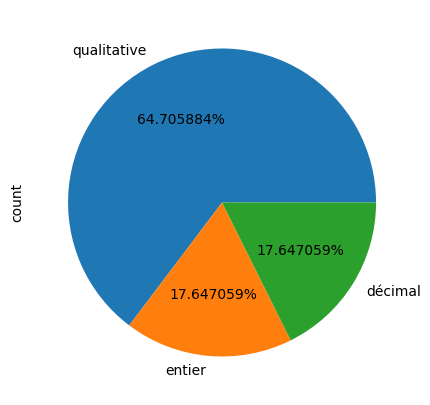

In [43]:
# Visualisation de la répartition des types de variables
plt.figure(figsize=(5,5))
row_data.dtypes.value_counts().plot.pie(labels=['qualitative','entier','décimal'], autopct='%2f%%')
plt.show()

##1.1 Valeurs manquantes

In [5]:
valeurs_m = pd.DataFrame({'colonne':row_data.isnull().sum().index, 'Nombres de variables nulles':row_data.isnull().sum().values})
valeurs_m

colonne  Nombres de variables nulles
0                    id                            0
1      type_emplacement                            0
2           domanialite                            1
3        arrondissement                            0
4   complement_addresse                       169235
5                numero                       200137
6                  lieu                            0
7        id_emplacement                            0
8      libelle_francais                         1497
9                 genre                           16
10               espece                         1752
11              variete                       163360
12     circonference_cm                            0
13            hauteur_m                            0
14  stade_developpement                        67205
15          remarquable                        63098
16       geo_point_2d_a                            0
17       geo_point_2d_b                            0

On voit qu'il y a 169235 valeurs manquantes dans la colonne complement_addresse

---



In [49]:
# En pourcentage:
valeurs_m = pd.DataFrame({'colonne':row_data.isnull().sum().index, 'variables nulles en %':(row_data.isnull().sum().values/row_data.shape[0])*100})
valeurs_m.sort_values(by='variables nulles en %', ascending=False)

colonne  variables nulles en %
4   complement_addresse              84.559577
10              variete              81.624088
13  stade_developpement              33.579498
14          remarquable              31.527404
9                espece               0.875400
7      libelle_francais               0.747988
8                 genre               0.007995
2           domanialite               0.000500
11     circonference_cm               0.000000
15       geo_point_2d_a               0.000000
12            hauteur_m               0.000000
0                    id               0.000000
1      type_emplacement               0.000000
6        id_emplacement               0.000000
5                  lieu               0.000000
3        arrondissement               0.000000
16       geo_point_2d_b               0.000000

On peut donc supprimer les 2 colonnes complément d'adresse et

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'id'),
  Text(1, 0, 'type_emplacement'),
  Text(2, 0, 'domanialite'),
  Text(3, 0, 'arrondissement'),
  Text(4, 0, 'complement_addresse'),
  Text(5, 0, 'numero'),
  Text(6, 0, 'lieu'),
  Text(7, 0, 'id_emplacement'),
  Text(8, 0, 'libelle_francais'),
  Text(9, 0, 'genre'),
  Text(10, 0, 'espece'),
  Text(11, 0, 'variete'),
  Text(12, 0, 'circonference_cm'),
  Text(13, 0, 'hauteur_m'),
  Text(14, 0, 'stade_developpement'),
  Text(15, 0, 'remarquable'),
  Text(16, 0, 'geo_point_2d_a'),
  Text(17, 0, 'geo_point_2d_b')])

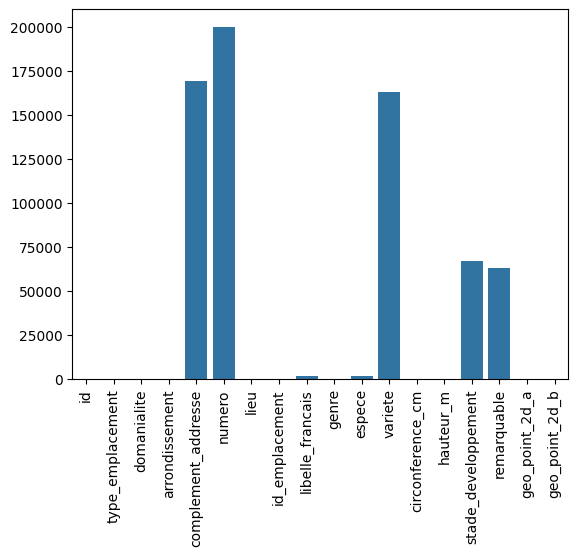

In [13]:
# Visualisation valeurs manquantes avec un bargraph
sns.barplot(data=valeurs_m)
plt.xticks(rotation=90)

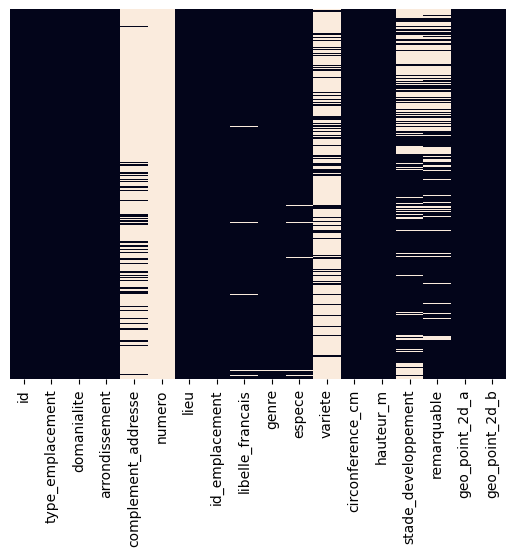

In [15]:
# Visualisation avec la heatmap de seaborn, noir = pas nul, beige = nulle
sns.heatmap(row_data.isnull(), yticklabels=False, cbar=False)

On voit que numero est complètement nul, on va supprimer cette colonne, de meme pour complement_adresse et variété

In [26]:
row_data.describe(include=(int, float))

id  circonference_cm      hauteur_m    remarquable  \
count  2.001370e+05     200137.000000  200137.000000  137039.000000   
mean   3.872027e+05         83.380479      13.110509       0.001343   
std    5.456032e+05        673.190213    1971.217387       0.036618   
min    9.987400e+04          0.000000       0.000000       0.000000   
25%    1.559270e+05         30.000000       5.000000       0.000000   
50%    2.210780e+05         70.000000       8.000000       0.000000   
75%    2.741020e+05        115.000000      12.000000       0.000000   
max    2.024745e+06     250255.000000  881818.000000       1.000000   

       geo_point_2d_a  geo_point_2d_b  
count   200137.000000   200137.000000  
mean        48.854491        2.348208  
std          0.030234        0.051220  
min         48.742290        2.210241  
25%         48.835021        2.307530  
50%         48.854162        2.351095  
75%         48.876447        2.386838  
max         48.911485        2.469759

In [27]:
row_data.describe(include=object)

type_emplacement domanialite   arrondissement complement_addresse  \
count            200137      200136           200137               30902   
unique                1           9               25                3795   
top               Arbre  Alignement  PARIS 15E ARRDT                 SN°   
freq             200137      104949            17151                 557   

                                               lieu id_emplacement  \
count                                        200137         200137   
unique                                         6921          69040   
top     PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         101001   
freq                                           2995           1324   

       libelle_francais     genre       espece     variete stade_developpement  
count            198640    200121       198385       36777              132932  
unique              192       175          539         436                   4  
top             Platane  Platanus  x hispanica  Baumannii'                   A  
freq              42508     42591        36409        4538               64438

avec : Pour variables numériques: std = ecart-type

---


pour varibales catégorielles: unique = nb de valeurs ≠
top = la variable la plus representé
freq = la fréquence de la valeur la plus représentée

# Nettoyage des données

1.1 Suppression données sans intéret

In [6]:
data = row_data.drop(columns=['variete', 'complement_addresse','numero'])

1.2 suppression des doublons si il y en a:

In [52]:
doublons = data.loc[data.duplicated(keep=False)]
doublons

Empty DataFrame
Columns: [id, type_emplacement, domanialite, arrondissement, lieu, id_emplacement, libelle_francais, genre, espece, circonference_cm, hauteur_m, stade_developpement, remarquable, geo_point_2d_a, geo_point_2d_b]
Index: []

Pas de doublons!

1.3 Valeurs abberantes

In [53]:
data.describe()

id  circonference_cm      hauteur_m    remarquable  \
count  2.001370e+05     200137.000000  200137.000000  137039.000000   
mean   3.872027e+05         83.380479      13.110509       0.001343   
std    5.456032e+05        673.190213    1971.217387       0.036618   
min    9.987400e+04          0.000000       0.000000       0.000000   
25%    1.559270e+05         30.000000       5.000000       0.000000   
50%    2.210780e+05         70.000000       8.000000       0.000000   
75%    2.741020e+05        115.000000      12.000000       0.000000   
max    2.024745e+06     250255.000000  881818.000000       1.000000   

       geo_point_2d_a  geo_point_2d_b  
count   200137.000000   200137.000000  
mean        48.854491        2.348208  
std          0.030234        0.051220  
min         48.742290        2.210241  
25%         48.835021        2.307530  
50%         48.854162        2.351095  
75%         48.876447        2.386838  
max         48.911485        2.469759

Les valeurs maximales de hauteur et circonference semble abberante. On va le verifier avec la methode de l'interquartile range.
L'interquarticile: ITQ = Q3 - Q1
Les valeurs abberantes selon cette methode sont celles qui sont supérieurs à 1.5*ITQ

In [72]:
Q1c = round(np.percentile(data['circonference_cm'], 25))

Q3c = round(np.percentile(data['circonference_cm'], 75))

ITQc = (Q3c-Q1c)
print(ITQc)
print(Q3c+1.5*ITQc)
print(Q1c-1.5*ITQc)
data.loc[(data['circonference_cm']>Q3c+1.5*ITQc)|(data['circonference_cm']<Q1c-1.5*ITQc)]
Q1h = round(np.percentile(data['hauteur_m'], 25))

Q3h = round(np.percentile(data['hauteur_m'], 75))

ITQh = (Q3h-Q1h)
print(Q3h+1.5*ITQh)
print(Q1h-1.5*ITQh)
display(data.loc[(data['hauteur_m']>Q3c+1.5*ITQh)|(data['hauteur_m']<Q1c-1.5*ITQh)])
print(f'Les valeurs de circonference dépassant les {Q3c+1.5*ITQc} et étant en dessous de {Q1c-1.5*ITQc} sont considérées comme abberantes. \n Et les hauteurs dépassant les {Q3h+1.5*ITQh} et étant en dessous de {Q1h-1.5*ITQh} sont considérées comme abberantes.')

85
242.5
-97.5
22.5
-5.5


id type_emplacement domanialite     arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

                                                     lieu id_emplacement  \
0               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4              PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
...                                                   ...            ...   
200132  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170151   
200133  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170152   
200134  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170153   
200135  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170154   
200136  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170155   

           libelle_francais      genre         espece  circonference_cm  \
0                Marronnier   Aesculus  hippocastanum                20   
1                        If      Taxus        baccata                65   
2                        If      Taxus        baccata                90   
3                    Erable       Acer        negundo                60   
4              Arbre à miel  Tetradium      daniellii                38   
...                     ...        ...            ...               ...   
200132                  NaN   Castanea       fargesii                 0   
200133  Arbre aux mouchoirs    Davidia    involucrata                 0   
200134             Peuplier    Populus        simonii                 0   
200135                Chêne    Quercus         n. sp.                 0   
200136            Raisinier    Hovenia         dulcis                 0   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
0               5                 NaN          0.0       48.857620   
1               8                   A          NaN       48.857656   
2              10                   A          NaN       48.857705   
3               8                   A          NaN       48.857722   
4               0                 NaN          NaN       48.890435   
...           ...                 ...          ...             ...   
200132          0                 NaN          0.0       48.821957   
200133          0                 NaN          0.0       48.823254   
200134          0                 NaN          0.0       48.822907   
200135          0                 NaN          0.0       48.822522   
200136          0                 NaN          0.0       48.820445   

        geo_point_2d_b  
0             2.320962  
1             2.321031  
2             2.321061  
3             2.321006  
4             2.315289  
...                ...  
200132        2.456264  
200133        2.457935  
200134        2.457970  
200135        2.455956  
200136        2.454856  

[187535 rows x 15 columns]

Les valeurs de circonference dépassant les 242.5 et étant en dessous de -97.5 sont considérées comme abberantes. 
 Et les hauteurs dépassant les 22.5 et étant en dessous de -5.5 sont considérées comme abberantes.


On va regarder maintenant si certaines valeurs de circonference et de hauteur sont en "conflit", c'est à dire qu'elles sont absurde ensemble. Par exemple, un arbre de 5m mais de circonference 0 ou l'inverse.

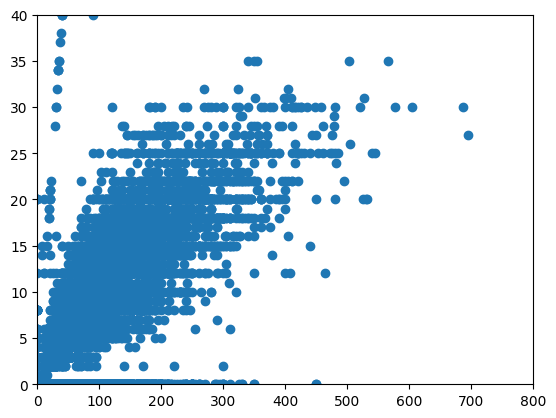

In [14]:
plt.scatter(data['circonference_cm'],data['hauteur_m'])
plt.xlim(0,800)
plt.ylim(0,40)
plt.show()

On peut voir qu'il y a des points situés sur l'axe des abscisse, ce qui signifie qu'ils sont en conflits, que ces valeurs sont absurdes, ce sont des outliers

Une autre méthode pour detecter les outliers et de regarder l'historigramme

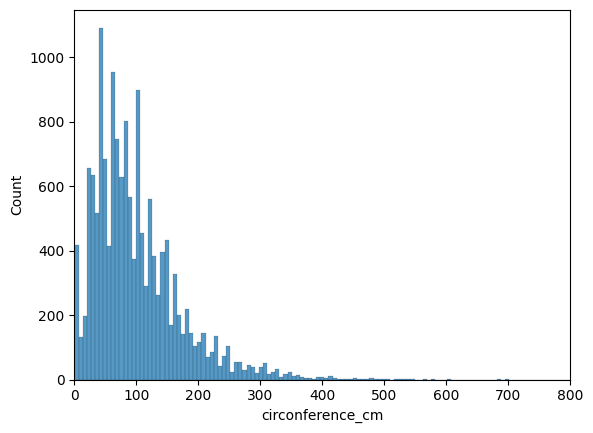

In [18]:
sns.histplot(data=data, x='circonference_cm')
plt.xlim(0,800)
plt.show()

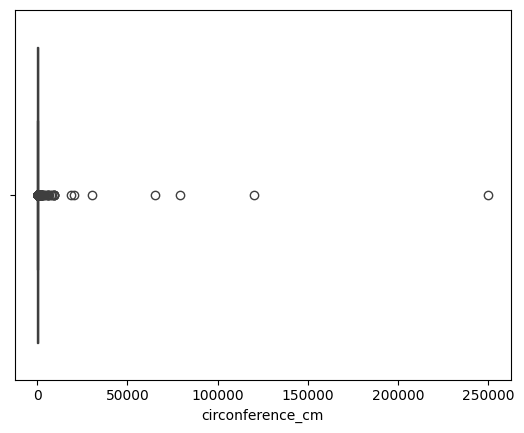

In [91]:
sns.boxplot(data=data, x='circonference_cm')
plt.show()

Avec le graphique:'Box', on peut voir qu'il y a qu'une valeur a environ 250 000, c'est bien un outliers, tout comme celle superieurs a 50 000. On peut donc les remplacer par Nan. De plus, il y a plus de 2 500 valeurs nulles, on va donc les remplacer par la mediane des la circonference.
D'apres un site sur les arbres de Paris, on peut considerer qu'une circonference superieur à 800m est absurde, on les remplacera par NaN

In [7]:
outliers_c=(data.loc[(data['circonference_cm']>800)|(data['circonference_cm']==0)].shape[0]/data.shape[0])*100
print("il y a ",str(round(outliers_c,2)),"% d'outliers pour la circonference")

il y a  12.96 % d'outliers pour la circonference


In [43]:
print(data.columns.get_loc('circonference_cm'))

10


In [8]:
# On traite les outliers de circonference

# Create a copy of the DataFrame to avoid modifying the original
data_copy = data.copy()

# Replace zeros with median in a single step using vectorized operation
data_copy['circonference_cm'] = np.where(data_copy['circonference_cm'] == 0,
data_copy['circonference_cm'].median(),
data_copy['circonference_cm'])

# Replace values greater than 800 with NaN in a single step
data_copy.loc[data_copy['circonference_cm'] > 800, 'circonference_cm'] = np.nan

data_clean = data_copy.copy()

In [9]:
# On verifie qu'ils ont été traités

data_clean.loc[(data_clean['circonference_cm']>800)|(data_clean['circonference_cm']==0)]

Empty DataFrame
Columns: [id, type_emplacement, domanialite, arrondissement, lieu, id_emplacement, libelle_francais, genre, espece, circonference_cm, hauteur_m, stade_developpement, remarquable, geo_point_2d_a, geo_point_2d_b]
Index: []

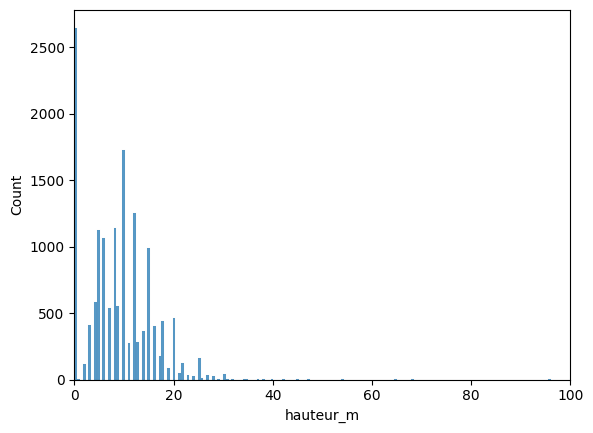

In [9]:
sns.histplot(data=data x='hauteur_m')
plt.xlim(0,100)
plt.show()

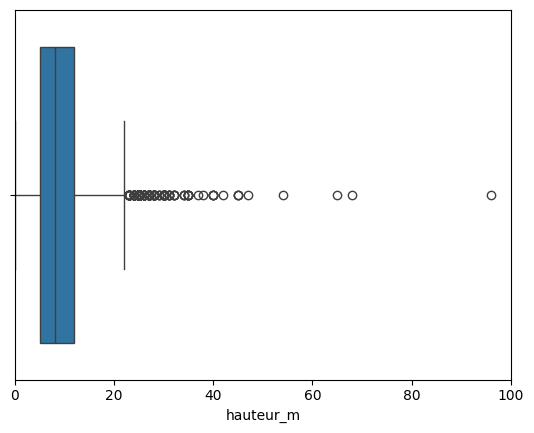

In [6]:
sns.boxplot(data=data, x='hauteur_m')
plt.xlim(0,100)
plt.show()

In [10]:
outliers_h=(data.loc[(data['hauteur_m']>40)|(data['hauteur_m']==0)].shape[0]/data.shape[0])*100
print("il y a ",str(round(outliers_h,2)),"% d'outliers pour la hauteur")

il y a  19.84 % d'outliers pour la hauteur


On va remplacer les hauteurs abberantes (> à 40) par NaN et les valeurs nulles par la mediane

In [11]:
data_clean.loc[data_clean['hauteur_m']>40, 'hauteur_m']= np.NaN
data_clean['hauteur_m']=np.where(data_clean['hauteur_m']==0, data_clean['hauteur_m'].median(), data_clean['hauteur_m'])


In [12]:
# On verifie que les valeurs ont été modifiés
data_clean.loc[(data_clean['hauteur_m']==0)|(data_clean['hauteur_m']>40)]

Empty DataFrame
Columns: [id, type_emplacement, domanialite, arrondissement, lieu, id_emplacement, libelle_francais, genre, espece, circonference_cm, hauteur_m, stade_developpement, remarquable, geo_point_2d_a, geo_point_2d_b]
Index: []

On va afficher le dataset partiellement nettoyé pour voir ce qu'on peut encore traité

In [105]:
data_clean

id type_emplacement domanialite     arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

                                                     lieu id_emplacement  \
0               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4              PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
...                                                   ...            ...   
200132  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170151   
200133  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170152   
200134  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170153   
200135  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170154   
200136  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170155   

           libelle_francais      genre         espece  circonference_cm  \
0                Marronnier   Aesculus  hippocastanum              20.0   
1                        If      Taxus        baccata              65.0   
2                        If      Taxus        baccata              90.0   
3                    Erable       Acer        negundo              60.0   
4              Arbre à miel  Tetradium      daniellii              38.0   
...                     ...        ...            ...               ...   
200132                  NaN   Castanea       fargesii              70.0   
200133  Arbre aux mouchoirs    Davidia    involucrata              70.0   
200134             Peuplier    Populus        simonii              70.0   
200135                Chêne    Quercus         n. sp.              70.0   
200136            Raisinier    Hovenia         dulcis              70.0   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
0             5.0                 NaN          0.0       48.857620   
1             8.0                   A          NaN       48.857656   
2            10.0                   A          NaN       48.857705   
3             8.0                   A          NaN       48.857722   
4             8.0                 NaN          NaN       48.890435   
...           ...                 ...          ...             ...   
200132        8.0                 NaN          0.0       48.821957   
200133        8.0                 NaN          0.0       48.823254   
200134        8.0                 NaN          0.0       48.822907   
200135        8.0                 NaN          0.0       48.822522   
200136        8.0                 NaN          0.0       48.820445   

        geo_point_2d_b  
0             2.320962  
1             2.321031  
2             2.321061  
3             2.321006  
4             2.315289  
...                ...  
200132        2.456264  
200133        2.457935  
200134        2.457970  
200135        2.455956  
200136        2.454856  

[200137 rows x 15 columns]

In [106]:
# On regarde si les id sont bien uniques, (si ils y a autant d'id differents que de lignes)
print(len(data_clean['id'].unique())==data_clean.shape[0])

True


In [107]:
data_clean['type_emplacement'].unique()

array(['Arbre'], dtype=object)

la colonne type emplacement n'a qu'une valeur : arbre , elle nous est donc inutile, on peut la supprimer pour pas encombrer notre dataset inutilement

In [108]:
data_clean = data_clean.drop('type_emplacement', axis=1)
data_clean.head(2)

id domanialite  arrondissement  \
0  99874      Jardin  PARIS 7E ARRDT   
1  99875      Jardin  PARIS 7E ARRDT   

                                        lieu id_emplacement libelle_francais  \
0  MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19       Marronnier   
1  MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20               If   

      genre         espece  circonference_cm  hauteur_m stade_developpement  \
0  Aesculus  hippocastanum              20.0        5.0                 NaN   
1     Taxus        baccata              65.0        8.0                   A   

   remarquable  geo_point_2d_a  geo_point_2d_b  
0          0.0       48.857620        2.320962  
1          NaN       48.857656        2.321031

In [88]:
# On vérifie que chaque colonne prend differentes valeurs qui sont 'normales'
display(data_clean['domanialite'].unique())
display(data_clean['arrondissement'].unique())
display(data_clean['lieu'].unique())
display(data_clean['id_emplacement'].unique())
display(data_clean['genre'].unique())
display(data_clean['libelle_francais'].unique())
display(data_clean['espece'].unique())

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE',
       'BOIS DE VINCENNES'], dtype=object)

array(['MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E',
       'PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING',
       'SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE LA PORTE MAILLOT',
       ..., 'TERRAIN D EDUCATION PHYSIQUE / 49 RUE OLIVIER METRA',
       'RUE EDOUARD QUENU', 'RUE DU GENERAL NIESSEL'], dtype=object)

array(['19', '20', '21', ..., '720170153', '720170154', '720170155'],
      dtype=object)

array(['Aesculus', 'Taxus', 'Acer', 'Tetradium', 'Platanus', 'Sophora',
       'Prunus', 'Fagus', 'Celtis', 'Tilia', 'Quercus', 'Koelreuteria',
       'Liquidambar', 'Juglans', 'Cercidiphyllum', 'Ligustrum',
       'Liriodendron', 'Pinus', 'Abies', 'Ostrya', 'Cedrus', 'Paulownia',
       'Thuja', 'Malus', 'Pyrus', 'Betula', 'Ulmus', 'Cercis', 'Robinia',
       'Fraxinus', 'Crataegus', 'Gleditsia', 'Ginkgo', 'Mespilus',
       'Salix', 'Magnolia', 'Populus', 'Chamaecyparis', 'Diospyros',
       'Morus', 'Pterocarya', 'Corylus', 'Sorbus', 'Cydonia', 'Parrotia',
       'Zelkova', 'Alnus', 'Cladrastis', 'Fontanesia', 'Cornus', 'Toona',
       'Catalpa', 'Ilex', 'Buxus', 'Metasequoia', 'Gymnocladus',
       'Maclura', 'Cephalotaxus', 'Rhus', 'Castanea', 'Ailanthus',
       'Broussonetia', 'Sequoiadendron', 'Lagerstroemia', 'Pterostyrax',
       'Eucalyptus', 'Olea', 'Ficus', 'Carpinus', 'Sambucus', 'Picea',
       'Amelanchier', 'Laburnum', 'Phillyrea', 'Sequoia', 'Aralia',
       'Phellode

array(['Marronnier', 'If', 'Erable', 'Arbre à miel', 'Platane', 'Sophora',
       'Prunus n. sp.', 'Hêtre', 'Micocoulier', 'Tilleul', 'Chêne',
       'Savonnier', 'Copalme', 'Noyer', 'Arbre à caramel', 'Troene',
       'Tulipier', 'Pin', 'Sapin', 'Cerisier à fleurs', 'Charme-Houblon',
       'Cèdre', 'Paulownia', 'Thuya', 'Pommier à fleurs', 'Poirier',
       'Pommier', 'Bouleau', 'Orme', 'Arbre de Judée', 'Robinier',
       'Frêne', 'Aubépine', 'Fevier', 'Prunier à fleurs',
       'Arbre aux quarante écus', 'Néflier commun', 'Saule', 'Magnolia',
       'Prunier à fruits', 'Poirier à fleurs', 'Peuplier', 'Faux-cyprès',
       'Aubepine', nan, 'Plaqueminier', 'Mûrier', 'Pêcher', 'Pterocarya',
       'Merisier', 'Noisetier de Byzance', 'Alisier', 'Cognassier',
       'Parrotie de Perse - Arbre de fer', 'Poirier à fruits',
       'Orme de Sibérie', 'Frêne à fleurs', 'Aulne', 'Troëne',
       'Fontanesia', 'Cornouiller', 'Cedrele', 'Catalpa', 'Houx', 'Buis',
       'Metaséquoia', 'Chicot d

array(['hippocastanum', 'baccata', 'negundo', 'daniellii', 'x hispanica',
       'japonica', 'n. sp.', 'sylvatica', 'occidentalis', 'tomentosa',
       'robur', 'paniculata', 'rufinerve', 'styraciflua', 'nigra',
       'japonicum', 'lucidum', 'tulipifera', 'concolor', 'saccharinum',
       'x europaea', 'platyphyllos', 'platanoides', 'serrulata',
       'carpinifolia', 'libani', 'wallichiana', 'floribunda', 'pendula',
       'siliquastrum', 'pseudoacacia', 'excelsior', 'laevigata',
       'pseudoplatanus', 'triacanthos', 'cerasifera', 'campestre',
       'biloba', 'buergerianum', 'germanica', 'cerris', 'regia',
       'sylvestris', 'rubra', 'nigra subsp. nigra', 'alba',
       'tataricum subsp. ginnala', 'domestica', 'calleryana',
       'cappadocicum', 'x carnea', 'lawsoniana', 'x turneri', 'utilis',
       'maackii', 'kaki', 'cordata', 'persica', 'fraxinifolia',
       'frainetto', 'avium', 'x soulangeana', 'colurna', 'torminalis',
       'petraea', 'ilex', 'oblonga', 'davidii', 'com

In [89]:
display(data_clean['stade_developpement'].unique())
display(data_clean['remarquable'].unique())

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

array([ 0., nan,  1.])

On a déjà bien nettoyé, on recalcule les statistiques du jeux de données nettoyés

In [109]:
data_clean.describe(include=(int, float))

id  circonference_cm      hauteur_m    remarquable  \
count  2.001370e+05     200060.000000  199654.000000  137039.000000   
mean   3.872027e+05         88.689623       9.897698       0.001343   
std    5.456032e+05         55.488664       4.710091       0.036618   
min    9.987400e+04          1.000000       1.000000       0.000000   
25%    1.559270e+05         50.000000       7.000000       0.000000   
50%    2.210780e+05         70.000000       8.000000       0.000000   
75%    2.741020e+05        115.000000      12.000000       0.000000   
max    2.024745e+06        790.000000      40.000000       1.000000   

       geo_point_2d_a  geo_point_2d_b  
count   200137.000000   200137.000000  
mean        48.854491        2.348208  
std          0.030234        0.051220  
min         48.742290        2.210241  
25%         48.835021        2.307530  
50%         48.854162        2.351095  
75%         48.876447        2.386838  
max         48.911485        2.469759

In [110]:
data_clean.describe(include=object)

domanialite   arrondissement  \
count       200136           200137   
unique           9               25   
top     Alignement  PARIS 15E ARRDT   
freq        104949            17151   

                                               lieu id_emplacement  \
count                                        200137         200137   
unique                                         6921          69040   
top     PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         101001   
freq                                           2995           1324   

       libelle_francais     genre       espece stade_developpement  
count            198640    200121       198385              132932  
unique              192       175          539                   4  
top             Platane  Platanus  x hispanica                   A  
freq              42508     42591        36409               64438

##Graphique à partir des données nettoyées

<function matplotlib.pyplot.show(close=None, block=None)>

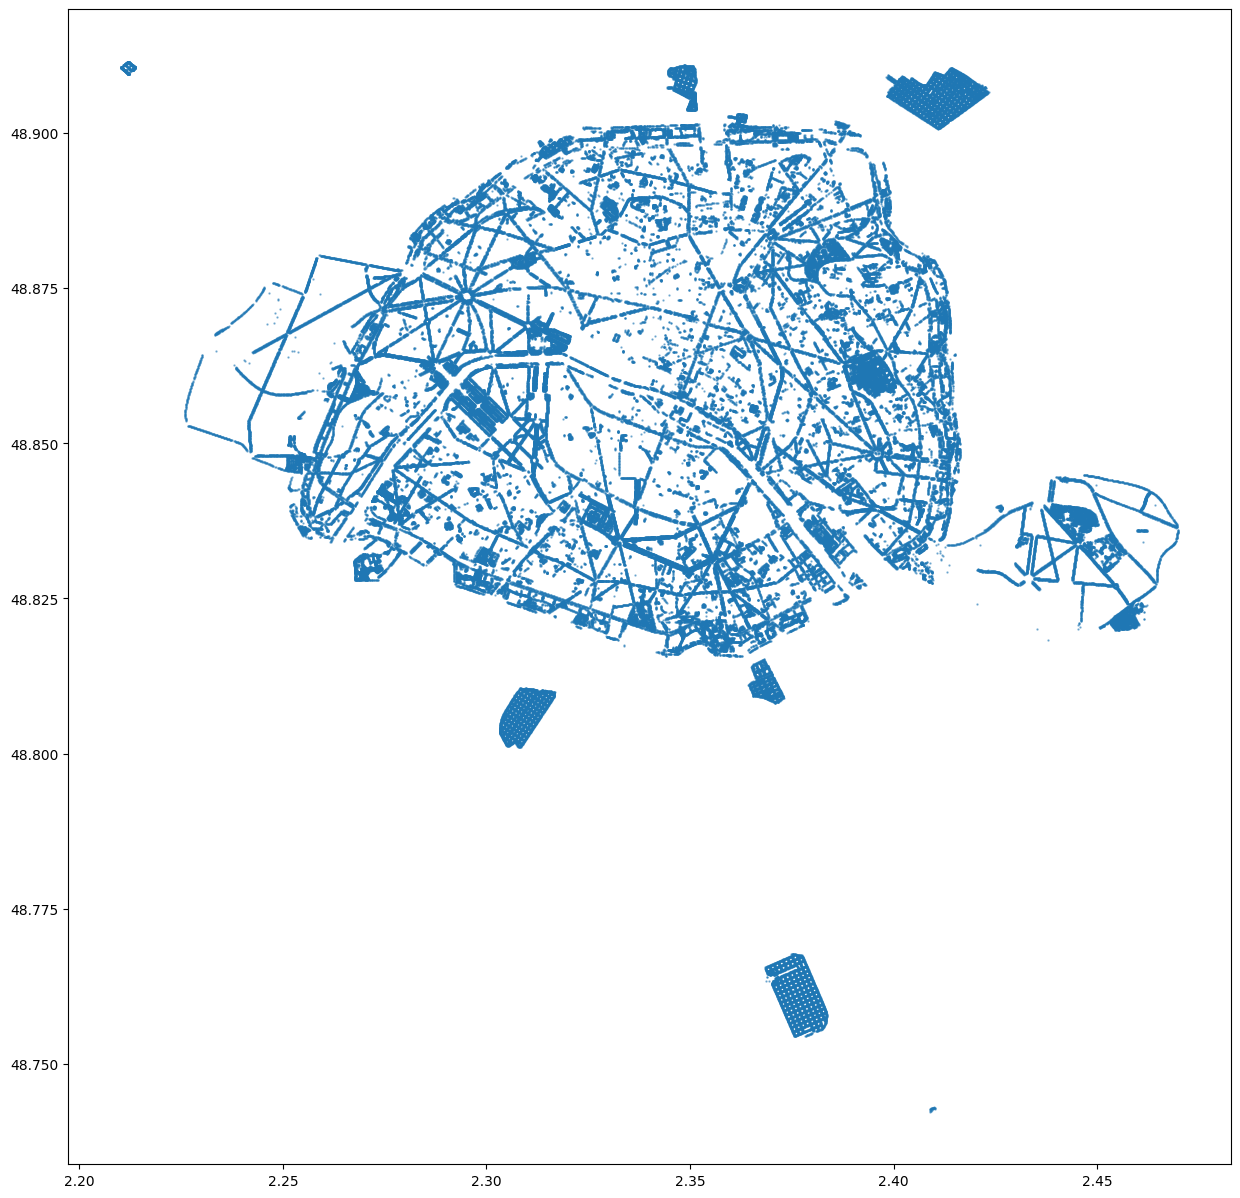

In [128]:
plt.figure(figsize=(15,15))
plt.scatter( data_clean['geo_point_2d_b'],data_clean['geo_point_2d_a'], s=0.5, alpha=0.5)
plt.show

Cela semble coherent avec la géographie de Paris

On va regarder quel arrondissement a le plus d'arbes

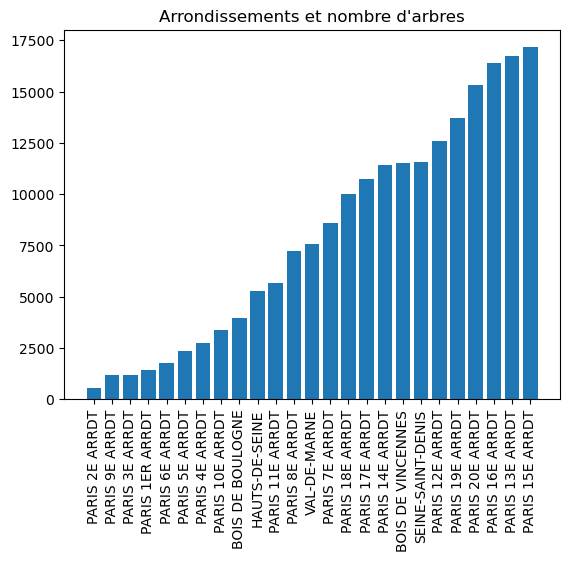

In [13]:
# On trie le tableau en fonction du nombre d'arbre
arrondissement_trie = data_clean['arrondissement'].value_counts().sort_values()
arrondissement_trie

plt.bar(x=arrondissement_trie.index, height=arrondissement_trie.values)
plt.title('Arrondissements et nombre d\'arbres')
plt.xticks(rotation=90)
plt.show()

On va maintenant afficher le nombres d' arbres par dominialités

In [14]:
data_clean['domanialite'].value_counts()
arbe_domanialite = pd.DataFrame({'Domanialité':data_clean['domanialite'].value_counts().index, 'Nombre d\'arbres':data_clean['domanialite'].value_counts().values})
arbe_domanialite

Domanialité  Nombre d'arbres
0    Alignement           104949
1        Jardin            46262
2     CIMETIERE            31926
3         DASCO             6422
4  PERIPHERIQUE             5327
5           DJS             3900
6          DFPE             1325
7           DAC               21
8         DASES                4

<function matplotlib.pyplot.show(close=None, block=None)>

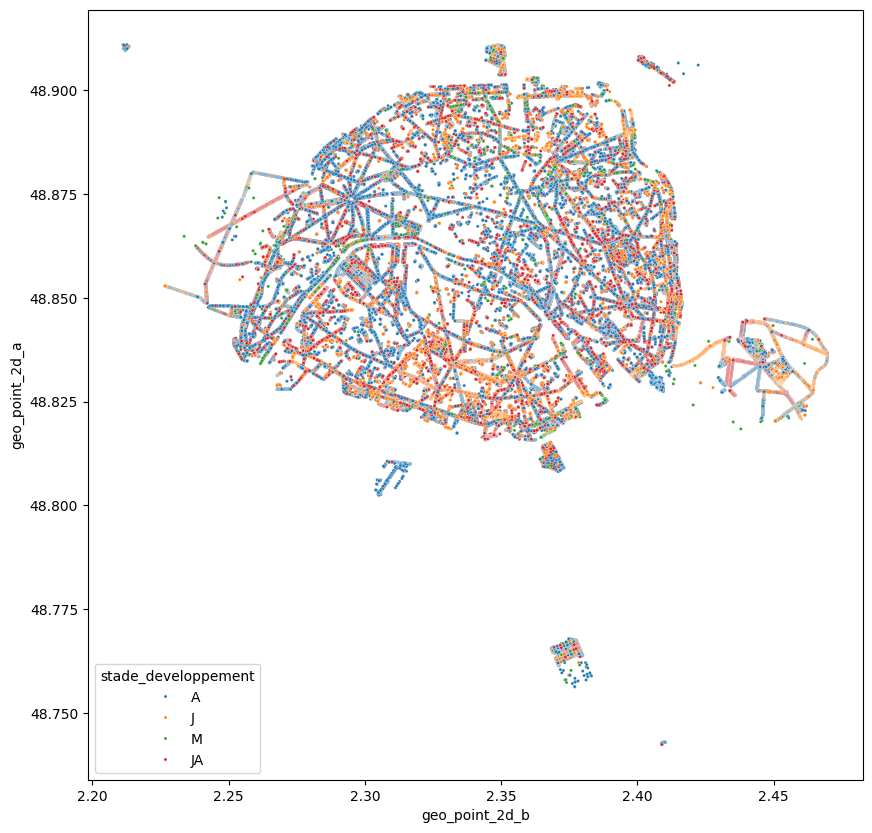

In [131]:
# carte des arbres de Paris en fonction de leur stade de developement
plt.figure(figsize=(10,10))

sns.scatterplot( data= data_clean ,x='geo_point_2d_b',y='geo_point_2d_a', hue= 'stade_developpement', s=5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

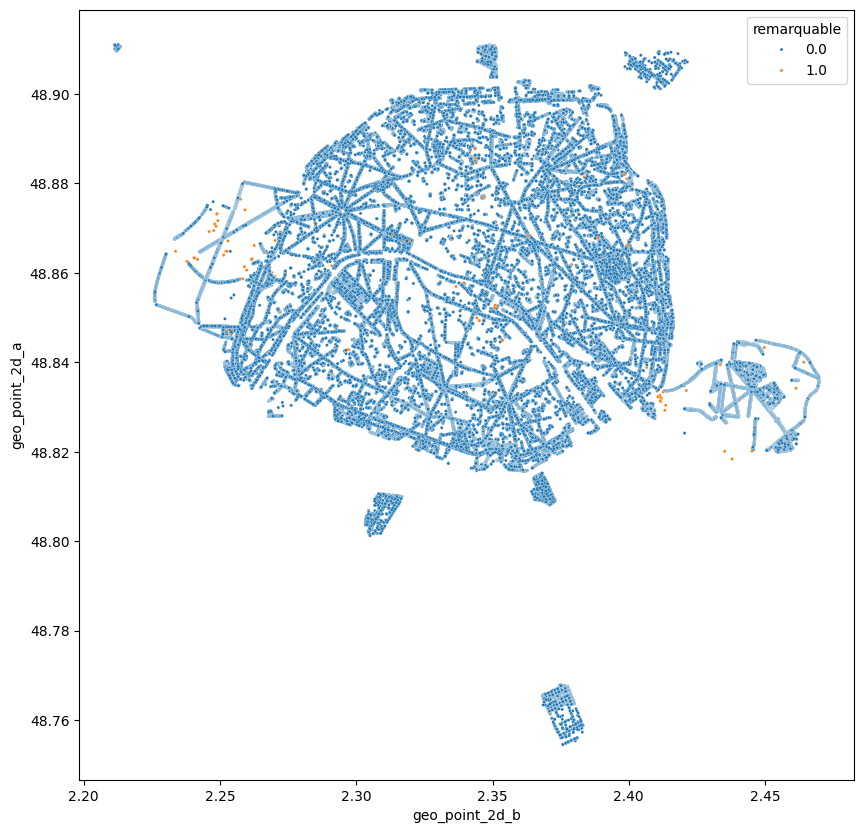

In [132]:
# carte des arbres de Paris en fonction de leur stade de developement
plt.figure(figsize=(10,10))

sns.scatterplot( data= data_clean ,x='geo_point_2d_b',y='geo_point_2d_a', hue= 'remarquable', s=5)

plt.show

##Répartition des arbres remarquables par dominialité

In [15]:
arbre_remarquable= data_clean.loc[data_clean['remarquable']==1]
arbre_remarquable['arrondissement'].value_counts()
arbe_r_arrondissement = pd.DataFrame({'Arrondissement':arbre_remarquable['arrondissement'].value_counts().index, 'Nombre d\'arbres remarquables':arbre_remarquable['arrondissement'].value_counts().values})
arbe_r_arrondissement

Arrondissement  Nombre d'arbres remarquables
0   PARIS 16E ARRDT                            53
1   PARIS 12E ARRDT                            27
2   PARIS 20E ARRDT                            15
3    PARIS 7E ARRDT                            12
4   PARIS 14E ARRDT                            10
5   PARIS 18E ARRDT                            10
6   PARIS 19E ARRDT                            10
7   PARIS 17E ARRDT                             8
8   PARIS 15E ARRDT                             7
9    PARIS 8E ARRDT                             6
10   PARIS 4E ARRDT                             6
11   PARIS 5E ARRDT                             6
12  PARIS 13E ARRDT                             4
13   PARIS 3E ARRDT                             3
14   PARIS 9E ARRDT                             2
15   PARIS 6E ARRDT                             2
16  PARIS 1ER ARRDT                             1
17  PARIS 11E ARRDT                             1
18  PARIS 10E ARRDT                             1

<function matplotlib.pyplot.show(close=None, block=None)>

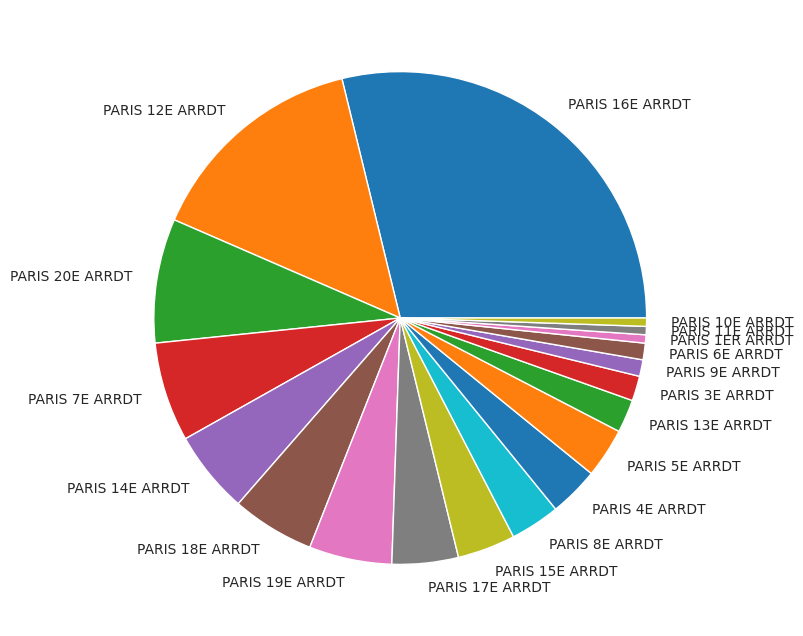

In [147]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 8))

plt.pie(labels=arbe_r_arrondissement['Arrondissement'], x= arbe_r_arrondissement['Nombre d\'arbres remarquables'])
plt.show

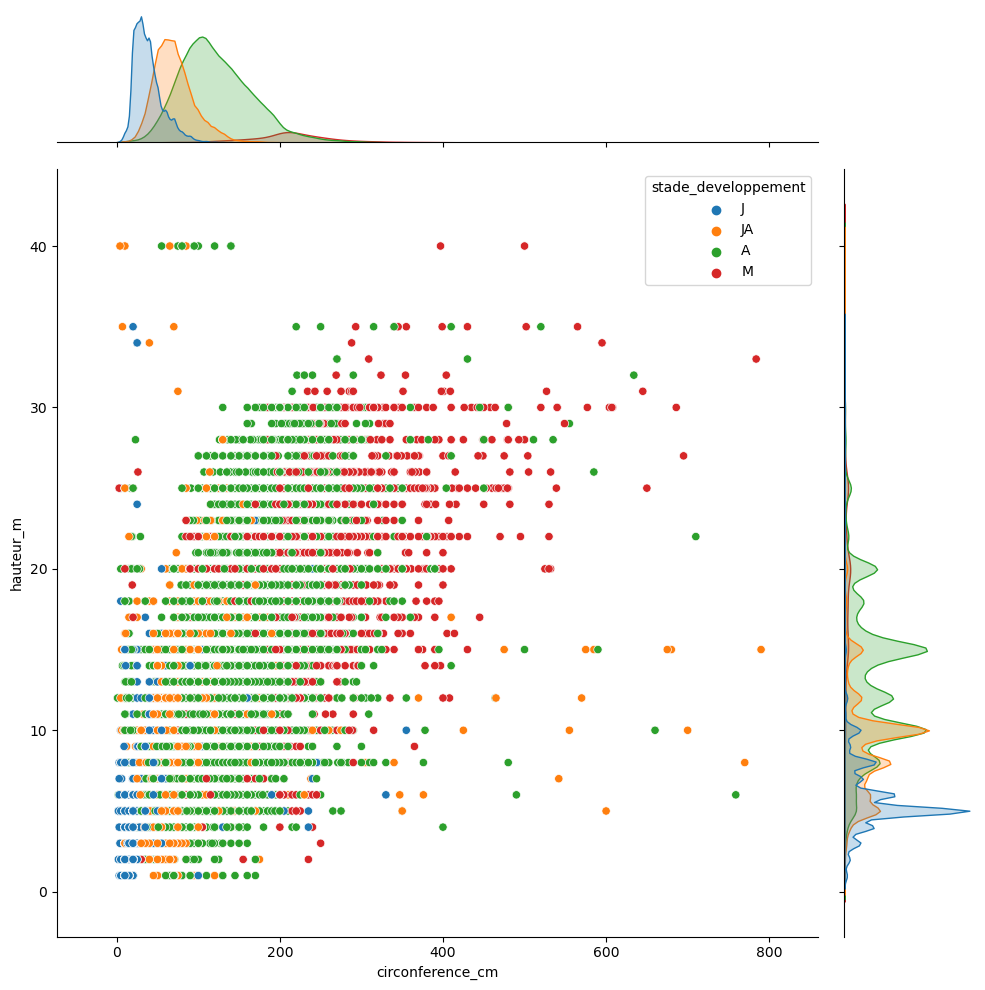

In [16]:
# Let's remove empty values
clean_data_dropna = data_clean.dropna(subset=['circonference_cm', 'hauteur_m', 'stade_developpement', 'libelle_francais'])

sns.jointplot(data=clean_data_dropna,
    x="circonference_cm",
    y="hauteur_m",
    hue="stade_developpement",
    hue_order=['J', 'JA', 'A', 'M'],
    height=10,
)

On peut voir que plus l'arbre est vieux plus la circonference est large. On va verifier cette correlation avec une matrice de corrélation. On peut voir aussi qu'il y a des arbres de 40m mais avec une circonference très faible. Il faudrait se pencher sur ces arbres et les traiter pour voir s'ils n'ont pas d'anomalies.

In [37]:
clean_data_dropna[['circonference_cm','hauteur_m']].corr()

circonference_cm  hauteur_m
circonference_cm          1.000000   0.790122
hauteur_m                 0.790122   1.000000

<Axes: >

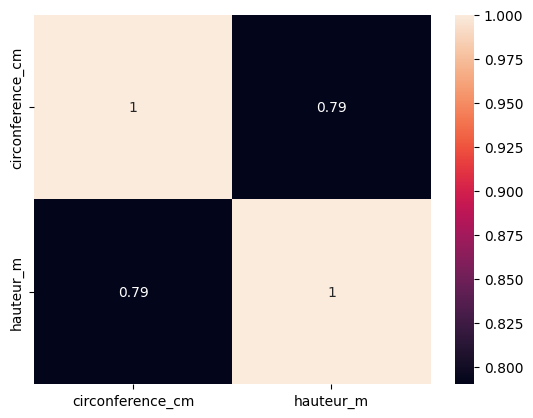

In [42]:
sns.heatmap(clean_data_dropna[['circonference_cm','hauteur_m']].corr(),annot=True)

In [17]:
# Affichage de ces arbres là
clean_data_dropna.loc[(clean_data_dropna['circonference_cm']<200)&(clean_data_dropna['hauteur_m']==40)]

id type_emplacement domanialite   arrondissement  \
95444    216326            Arbre  Alignement  PARIS 12E ARRDT   
97326    218246            Arbre  Alignement  PARIS 13E ARRDT   
97350    218270            Arbre  Alignement  PARIS 13E ARRDT   
102819   223962            Arbre  Alignement  PARIS 19E ARRDT   
112381   233931            Arbre  Alignement  PARIS 15E ARRDT   
119393   242394            Arbre  Alignement   PARIS 5E ARRDT   
120777   243800            Arbre  Alignement  PARIS 16E ARRDT   
121032   244067            Arbre  Alignement  PARIS 16E ARRDT   
128916   252120            Arbre  Alignement  PARIS 16E ARRDT   
130103   253330            Arbre  Alignement  PARIS 15E ARRDT   
139971   263504            Arbre  Alignement  PARIS 16E ARRDT   
187765  2008772            Arbre         DJS  PARIS 13E ARRDT   
194156  2017148            Arbre      Jardin  PARIS 20E ARRDT   

                                                   lieu id_emplacement  \
95444                                        RUE SIBUET         202005   
97326                         BOULEVARD AUGUSTE BLANQUI         503004   
97350                         BOULEVARD AUGUSTE BLANQUI         503002   
102819                              BOULEVARD MACDONALD        1402011   
112381                                     RUE LECOURBE        3105005   
119393                           BOULEVARD SAINT MICHEL         901008   
120777                     AVENUE DE LA PORTE D AUTEUIL         301043   
121032                     AVENUE DE LA PORTE D AUTEUIL         404037   
128916                               CHAUSSEE LA MUETTE         501007   
130103                                    RUE CAMBRONNE        1402021   
139971                                   AVENUE D EYLAU         101003   
187765        STADE CHARLETTY / 99 BOULEVARD KELLERMANN            183   
194156  JARDIN BENOIT FRACHON / 1 AVENUE BENOIT FRACHON         104006   

       libelle_francais     genre         espece  circonference_cm  hauteur_m  \
95444            Mûrier     Morus           alba              75.0       40.0   
97326           Platane  Platanus   occidentalis              80.0       40.0   
97350           Platane  Platanus   occidentalis              85.0       40.0   
102819          Platane  Platanus    x hispanica              65.0       40.0   
112381          Tilleul     Tilia        cordata             100.0       40.0   
119393          Platane  Platanus    x hispanica             140.0       40.0   
120777       Marronnier  Aesculus  hippocastanum             120.0       40.0   
121032       Marronnier  Aesculus  hippocastanum             140.0       40.0   
128916       Marronnier  Aesculus  hippocastanum              80.0       40.0   
130103          Tilleul     Tilia     x europaea              55.0       40.0   
139971       Marronnier  Aesculus  hippocastanum              95.0       40.0   
187765          Tilleul     Tilia      tomentosa              10.0       40.0   
194156   Arbre de Judée    Cercis   siliquastrum               4.0       40.0   

       stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
95444                    A          0.0       48.841520        2.402380  
97326                   JA          0.0       48.830120        2.352224  
97350                   JA          0.0       48.830166        2.352368  
102819                  JA          0.0       48.898896        2.375081  
112381                   A          0.0       48.837225        2.285177  
119393                   A          0.0       48.849510        2.342292  
120777                   A          0.0       48.847949        2.247573  
121032                   A          0.0       48.848078        2.249531  
128916                   A          0.0       48.858239        2.271585  
130103                   A          0.0       48.840674        2.303994  
139971                   A          0.0       48.863547        2.286120  
187765                  JA          0.0   

On peut voir que la plupart ont la domanialité:'Alignement', peut etre que ca joue?

## Stade de dévelopemment et hauteur, circonference

In [28]:
# Voir la hauteur et circonference moyenne en fonction du stade de développement

data_clean.groupby('stade_developpement').agg(hauteur_m_moyenne=('hauteur_m', 'mean'), circonference_cm_moyenne = ('circonference_cm','mean'))


hauteur_m_moyenne  circonference_cm_moyenne
stade_developpement                                             
A                            13.018687                122.233355
J                             5.802746                 38.834676
JA                            9.044939                 70.354829
M                            19.124058                218.625409

In [29]:
# distribution empirique de la variable qualitative stade de developpement
data_clean['stade_developpement'].value_counts()

stade_developpement
A     64438
JA    35444
J     26937
M      6113
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7a9b5e2a6860>,
 [Text(0.05270052092959301, 1.0987368452426403, 'A'),
  Text(-0.8109826812589815, -0.7431736611976998, 'JA'),
  Text(0.6615414313737839, -0.8788418143078568, 'J'),
  Text(1.0885407187451257, -0.1583638330991183, 'M')],
 [Text(0.028745738688868906, 0.5993110064959856, '48.474407%'),
  Text(-0.44235418977762625, -0.40536745156238163, '26.663256%'),
  Text(0.3608407807493366, -0.47936826234974, '20.263743%'),
  Text(0.5937494829518867, -0.08638027259951907, '4.598592%')])

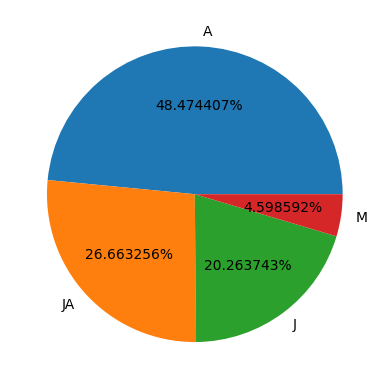

In [33]:
# Visualisation avec une pie chart
plt.pie(labels=data_clean['stade_developpement'].value_counts().index, x=data_clean['stade_developpement'].value_counts().values, autopct='%2f%%')

In [17]:
import plotly.express as px
# Most common trees per burrough
table = data_clean.pivot_table(
    values='id',
    index='arrondissement',
    columns='libelle_francais',
    aggfunc='count',
    observed=True,
)
fig = px.imshow(table,
    title="Type d'arbre par arrondissement",
    width=1000,
    height=800,
)
fig.show()

# Synthese

Pour conclure, l'optimisation des tournées d’entretien des arbres à Paris peut se baser sur trois axes clés : la clusterisation géographique pour réduire les déplacements, la priorisation des interventions selon l’état sanitaire des arbres, et une planification saisonnière adaptée aux besoins spécifiques de chaque essence. Il nous faudrait integrer également des modèles prédictifs à partir de l'historique des entretiens, pour planifier les tournées à l'avance et maximiser ainsi l'efficacité tout en réduisant les coûts logistiques et en assurant une meilleure gestion des arbres urbains.